### Importing libraries

In [1]:
!pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

### Dataset reading

In [3]:
df = pd.read_csv('AirlineReviews.csv')
df.head(2)

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e


### Handling missing values having nulls more than 5%

In [4]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage[missing_percentage > 0])

Aircraft         71.864354
CabinType         2.331312
DateFlown        29.710710
OriginCountry     1.296203
OverallScore      3.345564
Review            0.636515
Route            29.840485
Title             0.003090
TravelType       29.592522
TripVerified     54.031903
dtype: float64


In [5]:
columns_with_many_nulls = missing_percentage[missing_percentage > 5].index.tolist()
print("Columns with more than 5% missing values:", columns_with_many_nulls)

Columns with more than 5% missing values: ['Aircraft', 'DateFlown', 'Route', 'TravelType', 'TripVerified']


In [6]:
df.drop(columns=columns_with_many_nulls, axis=1, inplace=True)
df.shape  # 5 columns have been deleted

(129455, 17)

In [7]:
df.drop(columns=["unique_id","Slug"], axis=1, inplace=True)
df.shape # unique_id is removed

(129455, 15)

In [8]:
# Review and Title cannot be imputed
# Overall Score is a target, so it can also not be filled
df = df.dropna(subset=['Review', 'Title', 'OverallScore'])
print(df.shape)
print(df['Review'].isnull().sum())

(124297, 15)
0


In [9]:
print(f"Number of duplicate entries: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Number of duplicate entries: {df.duplicated().sum()}")

Number of duplicate entries: 40
Number of duplicate entries: 0


In [10]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage[missing_percentage > 0])

CabinType        1.646587
OriginCountry    0.689700
dtype: float64


In [11]:
df.head(2)

,AirlineName,CabinType,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,Title,ValueRating,WifiRating
0,AB Aviation,Economy Class,11th November 2019,0,4,4,Netherlands,9.0,yes,Moroni to Moheli. Turned out to be a pretty de...,4,5,pretty decent airline,3,0
1,AB Aviation,Economy Class,25th June 2019,0,1,1,UnitedKingdom,1.0,no,Moroni to Anjouan. It is a very small airline....,2,2,Not a good airline,2,0


In [12]:
df.tail(2)

,AirlineName,CabinType,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,Title,ValueRating,WifiRating
129453,Wizz Air,Economy Class,16th June 2010,0,0,0,CzechRepublic,5.0,yes,PRG-LTN and LTN-PRG were rather good flights. ...,0,0,Wizz Air customer review,4,0
129454,Wizz Air,Economy Class,6th June 2010,0,0,0,UnitedKingdom,1.0,no,London - Kiev. First problem started a few wee...,0,0,Wizz Air customer review,1,0


### Data Visualization

In [13]:
# Top 20 airlines (based on frequency) are displayed with their names
df["AirlineName"].value_counts().head(20)

AirlineName
American Airlines           5450
Spirit Airlines             4751
United Airlines             4461
British Airways             3507
Frontier Airlines           2924
Delta Air Lines             2673
Turkish Airlines            2276
Emirates                    2244
Lufthansa                   2192
Qatar Airways               2186
Air Canada                  2132
Ryanair                     2014
China Southern Airlines     1956
Qantas Airways              1765
Allegiant Air               1701
Etihad Airways              1670
Southwest Airlines          1631
KLM Royal Dutch Airlines    1442
Singapore Airlines          1432
Jetblue Airways             1423
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Airline Frequencies')

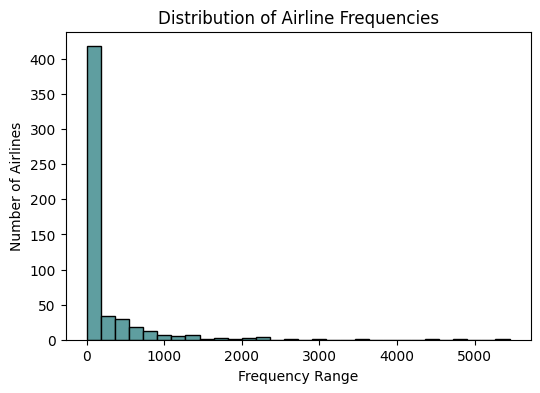

In [14]:
airline_counts = df['AirlineName'].value_counts()

plt.figure(figsize=(6, 4))
plt.hist(airline_counts, bins=30, color='cadetblue', edgecolor='black')

plt.xlabel('Frequency Range')
plt.ylabel('Number of Airlines')
plt.title('Distribution of Airline Frequencies')

In [15]:
airlines = df["AirlineName"].value_counts().head(20).index.tolist()
print(airlines)

['American Airlines', 'Spirit Airlines', 'United Airlines', 'British Airways', 'Frontier Airlines', 'Delta Air Lines', 'Turkish Airlines', 'Emirates', 'Lufthansa', 'Qatar Airways', 'Air Canada', 'Ryanair', 'China Southern Airlines', 'Qantas Airways', 'Allegiant Air', 'Etihad Airways', 'Southwest Airlines', 'KLM Royal Dutch Airlines', 'Singapore Airlines', 'Jetblue Airways']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19600\4199787040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='SeatComfortRating', data=airline_df, palette='Blues', alpha=0.7)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19600\4199787040.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='ServiceRating', data=airline_df, palette='Reds',  alpha=0.7)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19600\4199787040.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[2], x='ValueRating', data=airline_df, pal

Text(0, 0.5, 'Count')

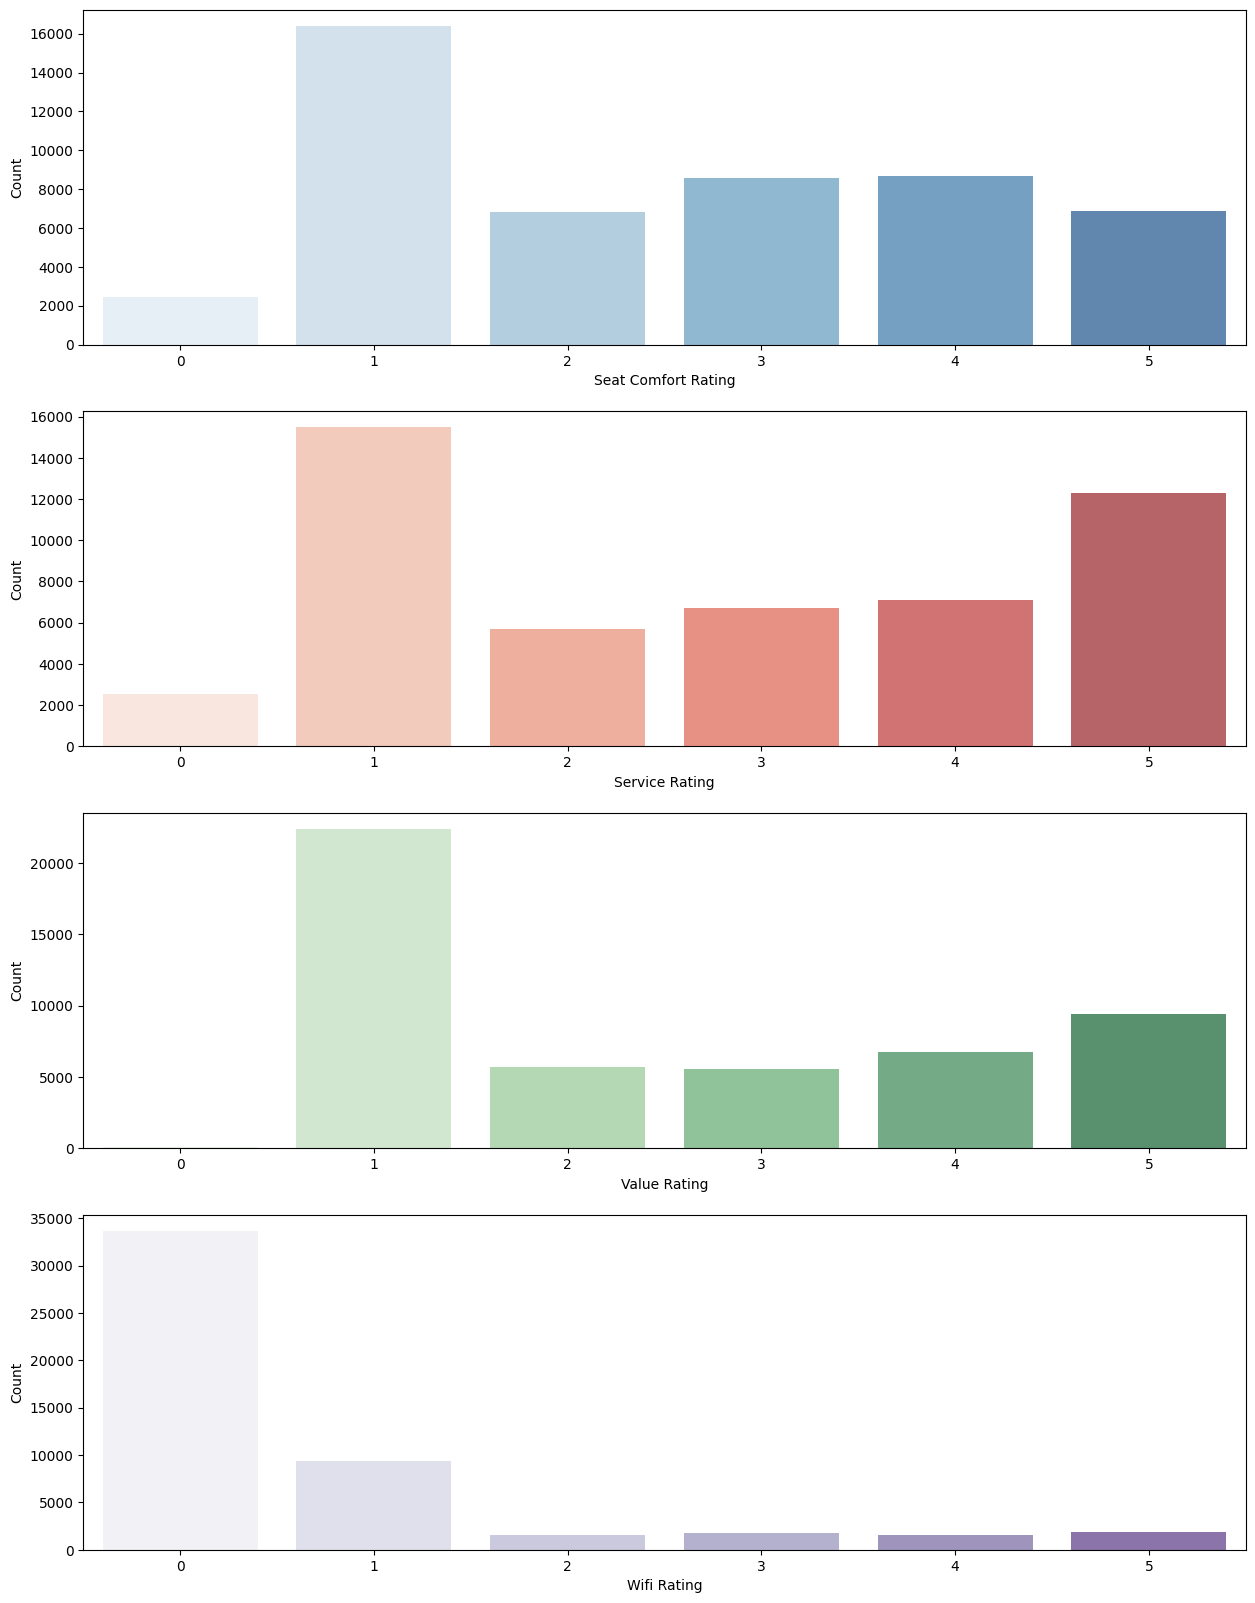

In [16]:
fig, axes = plt.subplots(4, 1, figsize=(15, 20))
airline_df = df[df['AirlineName'].isin(airlines)]

sns.countplot(ax=axes[0], x='SeatComfortRating', data=airline_df, palette='Blues', alpha=0.7)
sns.countplot(ax=axes[1], x='ServiceRating', data=airline_df, palette='Reds',  alpha=0.7)
sns.countplot(ax=axes[2], x='ValueRating', data=airline_df, palette='Greens', alpha=0.7)
sns.countplot(ax=axes[3], x='WifiRating', data=airline_df, palette='Purples', alpha=0.7)

axes[0].set_xlabel('Seat Comfort Rating')
axes[0].set_ylabel('Count')

axes[1].set_xlabel('Service Rating')
axes[1].set_ylabel('Count')

axes[2].set_xlabel('Value Rating')
axes[2].set_ylabel('Count')

axes[3].set_xlabel('Wifi Rating')
axes[3].set_ylabel('Count')

In [17]:
airlines = df["AirlineName"].value_counts().head(5).index.tolist()
airline_df = df[df['AirlineName'].isin(airlines)]

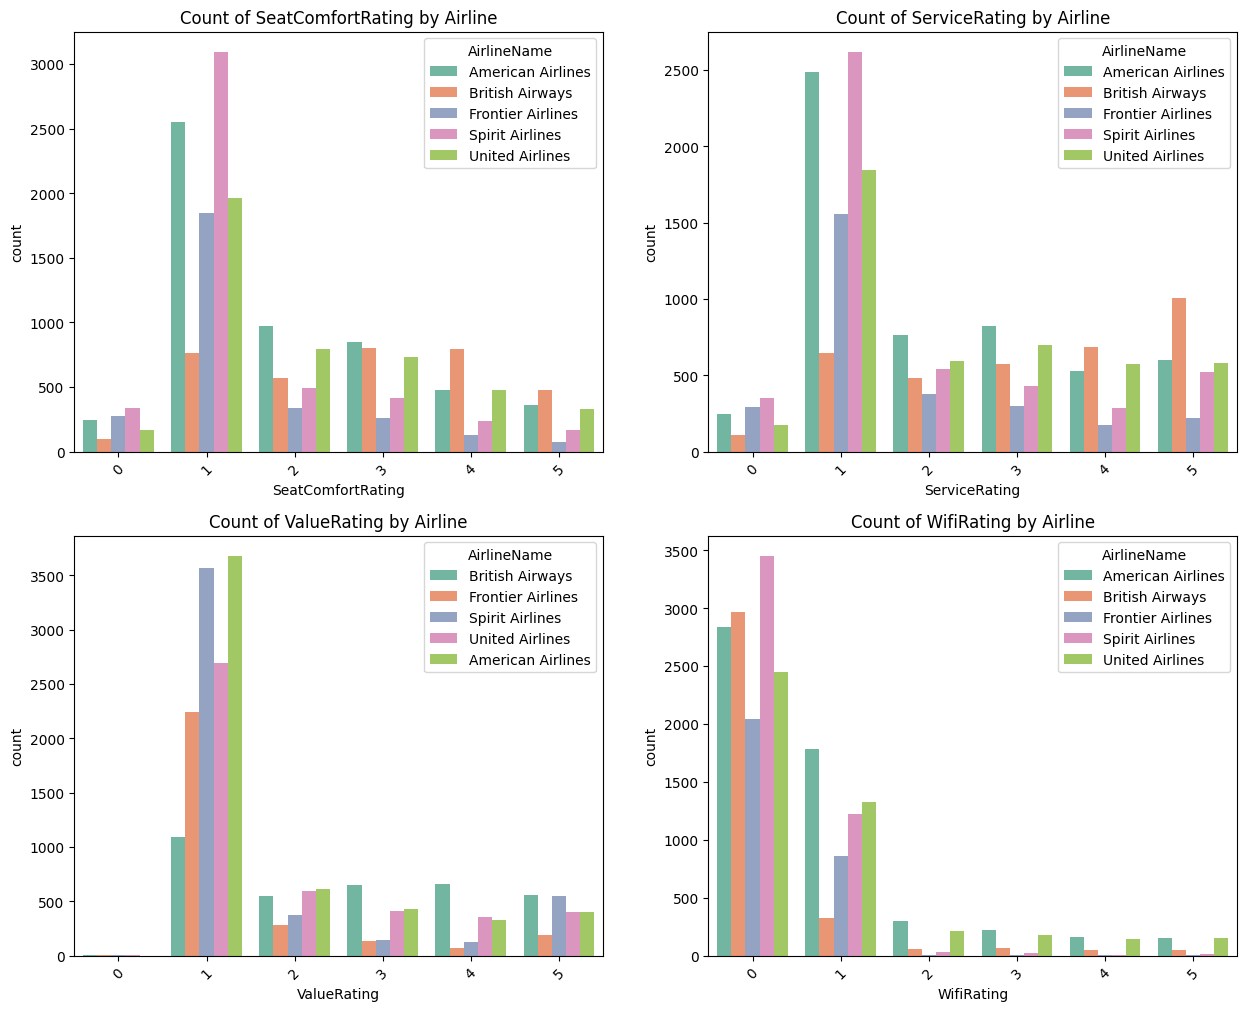

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

for i, (rating_category, ax) in enumerate(zip(['SeatComfortRating', 'ServiceRating', 'ValueRating', 'WifiRating'], axes.flatten())):
    sns.countplot(x=rating_category, data=airline_df, hue='AirlineName', ax=ax, palette='Set2')
    ax.set_title(f'Count of {rating_category} by Airline')
    ax.set_xlabel(f'{rating_category}')
    ax.tick_params(axis='x', rotation=45)

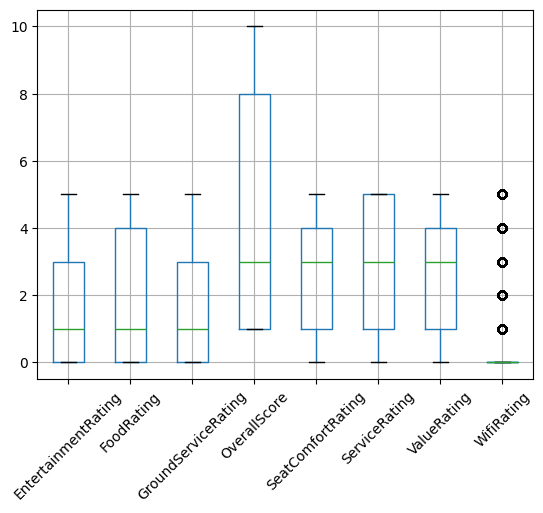

In [19]:
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [20]:
print("Number of Origin Country: ", len(df["OriginCountry"].unique()))

Number of Origin Country:  203


In [21]:
temp_data = df["OriginCountry"].value_counts().iloc[::10]
temp_data

OriginCountry
UnitedStates                        38241
Thailand                             1365
Ireland                               969
Israel                                517
Turkey                                303
Cyprus                                136
Oman                                  101
Estonia                                70
Myanmar                                44
Zambia                                 25
Laos                                   22
Bermuda                                17
CaymanIslands                          13
Ethiopia                                9
Guam                                    6
Seychelles                              4
UnitedStatesMinorOutlyingIslands        3
NorfolkIsland                           2
Tuvalu                                  1
HeardIslandandMcDonaldIslands           1
Niue                                    1
Name: count, dtype: int64

In [22]:
temp_data = df[df["OriginCountry"].isin(temp_data.index.tolist())]

In [23]:
temp_data.head(2)

,AirlineName,CabinType,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,Title,ValueRating,WifiRating
18,Adria Airways,Economy Class,29th July 2018,0,1,4,UnitedStates,1.0,no,Vienna to Sofia. The flight was delayed by 2 h...,4,1,bad customer service,1,0
24,Adria Airways,Economy Class,5th December 2017,0,1,1,UnitedStates,3.0,no,"Ljubljana to Vienna. Overall, the flight servi...",2,4,should be ashamed of their operations,3,0


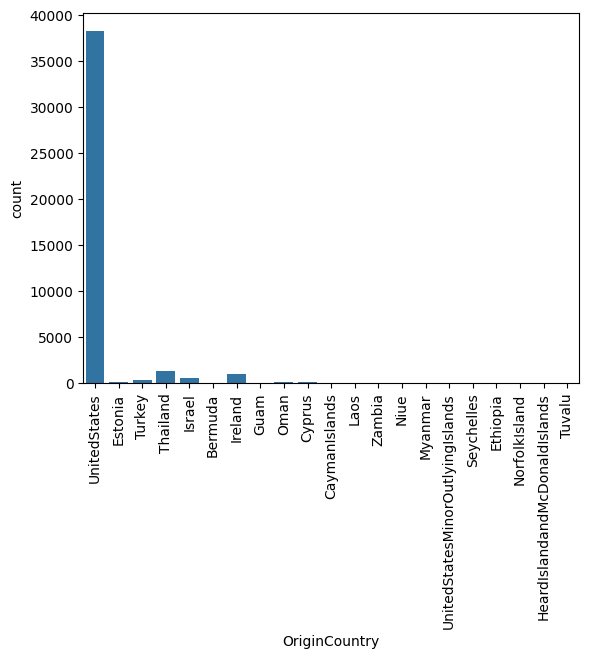

In [24]:
sns.countplot(temp_data, x = "OriginCountry")
plt.xticks(rotation=90) 
plt.show()

In [25]:
counts = df.groupby(["AirlineName", "OriginCountry"]).size().reset_index(name="count")
most_frequent_countries = counts.loc[counts.groupby("AirlineName")["count"].idxmax()]

for index, row in most_frequent_countries.iterrows():
    airline = row["AirlineName"]
    country = row["OriginCountry"]
    df.loc[(df["AirlineName"] == airline) & (df["OriginCountry"].isnull()), "OriginCountry"] = country

In [26]:
df.head(3)

,AirlineName,CabinType,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,Title,ValueRating,WifiRating
0,AB Aviation,Economy Class,11th November 2019,0,4,4,Netherlands,9.0,yes,Moroni to Moheli. Turned out to be a pretty de...,4,5,pretty decent airline,3,0
1,AB Aviation,Economy Class,25th June 2019,0,1,1,UnitedKingdom,1.0,no,Moroni to Anjouan. It is a very small airline....,2,2,Not a good airline,2,0
2,AB Aviation,Economy Class,25th June 2019,0,1,1,UnitedKingdom,1.0,no,Anjouan to Dzaoudzi. A very small airline and ...,2,1,flight was fortunately short,2,0


<Axes: xlabel='CabinType', ylabel='count'>

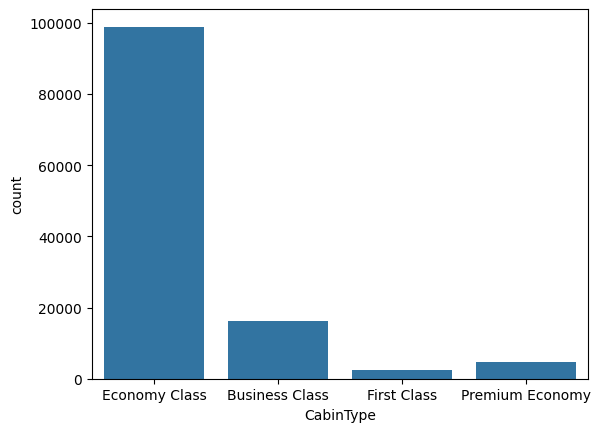

In [27]:
sns.countplot(df, x = "CabinType")

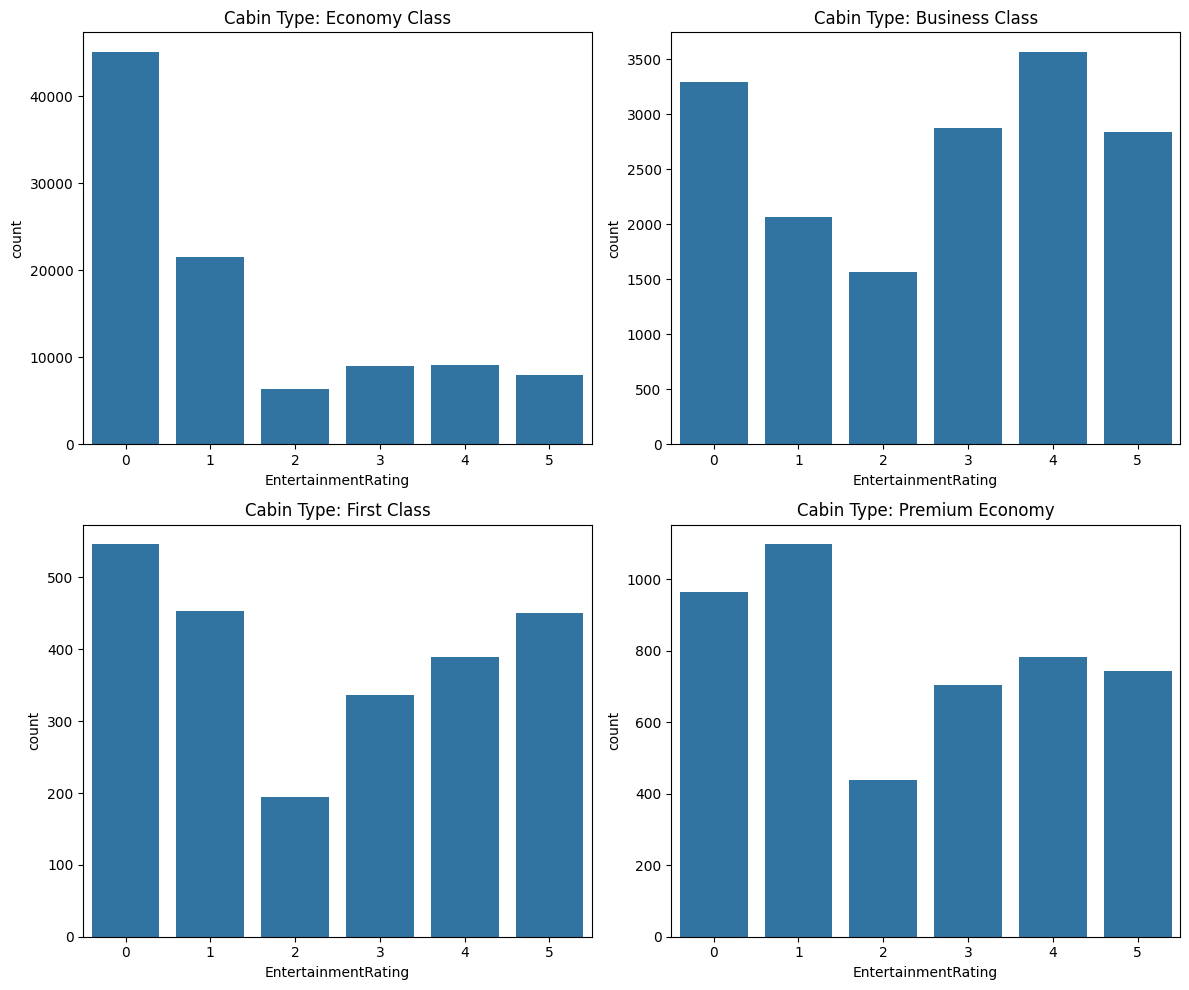

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, cabin_type in enumerate(["Economy Class", "Business Class", "First Class", "Premium Economy"]):
    sns.countplot(data=df[df["CabinType"] == cabin_type], x="EntertainmentRating", ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Cabin Type: {cabin_type}')

plt.tight_layout()
plt.show()

In [29]:
df.dropna(inplace=True)

In [30]:
df.isnull().any().any()

False

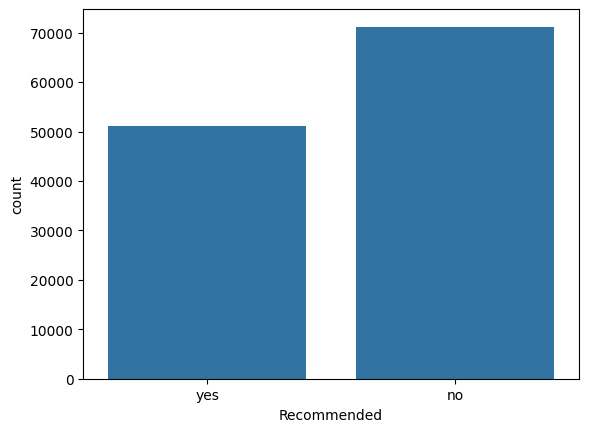

In [31]:
sns.countplot(x=df['Recommended'])
plt.show()

### Feature Engineering

In [32]:
def extract_date_parts(dt):
    parts = dt.split()  
    day = int(parts[0].rstrip("stndrdth"))
    month = parts[1]
    year = int(parts[2])  
    month_dict = {'january': 1, 'february': 2, 'march': 3, 
                  'april': 4, 'may': 5, 'june': 6, 
                  'july': 7, 'august': 8, 'september': 9, 
                  'october': 10, 'november': 11, 'december': 12}
    
    return day, month_dict[month.lower()], year

df[['Day', 'Month', 'Year']] = pd.DataFrame(df['DatePub'].apply(extract_date_parts).tolist())

In [33]:
df.drop(columns=['DatePub'], inplace=True)

In [34]:
cabin_type_mapping = {
    "Economy Class": 0,
    "Business Class": 1,
    "First Class": 2,
    "Premium Economy": 3
}

df["CabinType"] = df["CabinType"].map(cabin_type_mapping)

### Target encoding

In [35]:
target_encoder = ce.TargetEncoder(cols=['AirlineName', 'OriginCountry'])
df_encoded = target_encoder.fit_transform(df[['AirlineName', 'OriginCountry']], df['OverallScore'])

In [36]:
df_encoded

,AirlineName,OriginCountry
0,4.429620,5.005342
1,4.429620,5.367744
2,4.429620,5.367744
3,5.015402,5.100639
6,4.234751,5.424494
...,...,...
129448,3.203964,5.367744
129449,3.203964,3.216132
129451,3.203964,5.152704
129453,3.203964,5.004274


In [37]:
df[["AirlineName", "OriginCountry"]] = df_encoded[["AirlineName", "OriginCountry"]]

df.head(3)

,AirlineName,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,Title,ValueRating,WifiRating,Day,Month,Year
0,4.42962,0,0,4,4,5.005342,9.0,yes,Moroni to Moheli. Turned out to be a pretty de...,4,5,pretty decent airline,3,0,11.0,11.0,2019.0
1,4.42962,0,0,1,1,5.367744,1.0,no,Moroni to Anjouan. It is a very small airline....,2,2,Not a good airline,2,0,25.0,6.0,2019.0
2,4.42962,0,0,1,1,5.367744,1.0,no,Anjouan to Dzaoudzi. A very small airline and ...,2,1,flight was fortunately short,2,0,25.0,6.0,2019.0


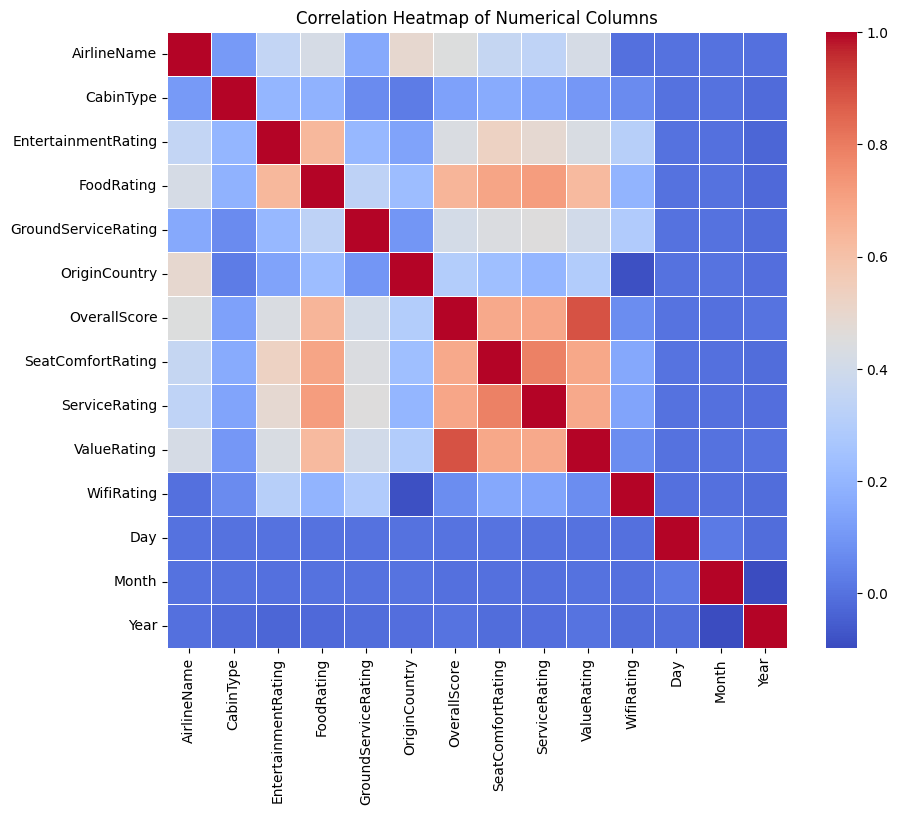

In [38]:
# HeatMap visualization
numerical_df = df.select_dtypes(include=["float64", "int64"])
corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [39]:
df_final = df.drop(["Review", "Title"], axis = 1)

In [40]:
df_final.to_csv("Cleaned_Airline_Reviews.csv", index=False)

### Text handling and analysis (Reviews and Titles)

### Model Building

- Training dataset: 95%
- Test dataset: 5%

In [41]:
!pip install xgboost

In [42]:
!pip install catboost

In [43]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

import xgboost as xgb
import catboost as cb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [44]:
X = df.drop(["Review", "Title", "Recommended"], axis = 1)
y = df["Recommended"].map({'yes':1, 'no':0})

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

### Random Forest

In [69]:
rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

In [52]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [47]:
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 20, min_samples_split = 5, min_samples_leaf = 4)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=5)

In [48]:
rf_preds = rf_classifier.predict(X_test)

In [51]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3559
           1       0.96      0.94      0.95      2552

    accuracy                           0.96      6111
   macro avg       0.96      0.96      0.96      6111
weighted avg       0.96      0.96      0.96      6111



In [50]:
print("Accuracy score: ", accuracy_score(y_test, rf_preds))
print("ROC AUC Score:", roc_auc_score(y_test, rf_preds))

Accuracy score:  0.9576174112256587
ROC AUC Score: 0.9554088667434144


### CatBoost

In [58]:
cb_model = cb.CatBoostClassifier(iterations=500, 
                                    learning_rate = 0.5,
                                   depth = 10,
                                   border_count = 128)
cb_model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=10)

0:	learn: 0.1687047	test: 0.1740603	best: 0.1740603 (0)	total: 198ms	remaining: 1m 38s
10:	learn: 0.0868101	test: 0.1120980	best: 0.1109510 (5)	total: 772ms	remaining: 34.3s
20:	learn: 0.0764894	test: 0.1149842	best: 0.1109510 (5)	total: 1.55s	remaining: 35.4s
30:	learn: 0.0669787	test: 0.1185375	best: 0.1109510 (5)	total: 2.4s	remaining: 36.2s
40:	learn: 0.0589687	test: 0.1202247	best: 0.1109510 (5)	total: 3.2s	remaining: 35.9s
50:	learn: 0.0532928	test: 0.1226179	best: 0.1109510 (5)	total: 4.22s	remaining: 37.1s
60:	learn: 0.0478202	test: 0.1242575	best: 0.1109510 (5)	total: 5.32s	remaining: 38.3s
70:	learn: 0.0425830	test: 0.1280717	best: 0.1109510 (5)	total: 6.51s	remaining: 39.3s
80:	learn: 0.0372532	test: 0.1315394	best: 0.1109510 (5)	total: 7.65s	remaining: 39.6s
90:	learn: 0.0330548	test: 0.1363095	best: 0.1109510 (5)	total: 8.76s	remaining: 39.4s
100:	learn: 0.0300591	test: 0.1369200	best: 0.1109510 (5)	total: 9.82s	remaining: 38.8s
110:	learn: 0.0272971	test: 0.1400783	best: 

In [60]:
cb_preds = cb_model.predict(X_test)

In [62]:
print(classification_report(y_test, cb_preds))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3559
           1       0.96      0.94      0.95      2552

    accuracy                           0.96      6111
   macro avg       0.96      0.95      0.96      6111
weighted avg       0.96      0.96      0.96      6111



In [67]:
print("Accuracy score: ", cb_model.score(X_test, y_test))
print("ROC AUC Score:", roc_auc_score(y_test, cb_preds))

Accuracy score:  0.9571264932089675
ROC AUC Score: 0.9547102207217166


### XGBoost

In [49]:
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'lambda': 1,
    'alpha': 0
}

In [46]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

model = xgb.train(params, dtrain, num_round)

In [48]:
y_pred_prob = model.predict(dtest)
y_pred = [1 if p > 0.5 else 0 for p in y_pred_prob]

In [49]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.958271968581247
Precision: 0.9537732121691032
Recall: 0.9459247648902821
F1 Score: 0.9498327759197325
ROC AUC Score: 0.991479942677005


#### Validating the model using cross validation

In [50]:
def evaluate_model(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    return accuracy, precision, recall, f1, roc_auc

In [53]:
num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

for train_index, test_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    dtrain_cv = xgb.DMatrix(X_train, label=y_train)
    dval_cv = xgb.DMatrix(X_val, label=y_val)

    model_cv = xgb.train(params, dtrain_cv, num_round)

    y_prob_cv = model_cv.predict(dval_cv)
    y_pred_cv = [1 if p > 0.5 else 0 for p in y_prob_cv]

    accuracy, precision, recall, f1, roc_auc = evaluate_model(y_val, y_pred_cv, y_prob_cv)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    roc_aucs.append(roc_auc)

avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean(f1_scores)
avg_roc_auc = np.mean(roc_aucs)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)
print("Average ROC AUC Score:", avg_roc_auc)

Average Accuracy: 0.9618856004757103
Average Precision: 0.9582120293447535
Average Recall: 0.9501487681907934
Average F1 Score: 0.9541610353716197
Average ROC AUC Score: 0.9927564922574825
